<a href="https://colab.research.google.com/github/IamJac/AStarSearchAlgorithm/blob/main/LinearRegression01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing modules to be used bold text**

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error

**Loading the dataset**

Converting dataset into a pandas dataframe.

Checking if the data is correctly converted into a pandas dataframe.

In [174]:
iris_data=datasets.load_iris()
print(iris_data)
print()
data=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
print(data.loc[0:6])
print(data.tail())

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

**Exploratory Data Analysis**

(150, 4)
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000
Features correlation
                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           1.000000         -0.117570           0.871754          0.817941
sepal width (cm)           -0.117570          1.000000          -0

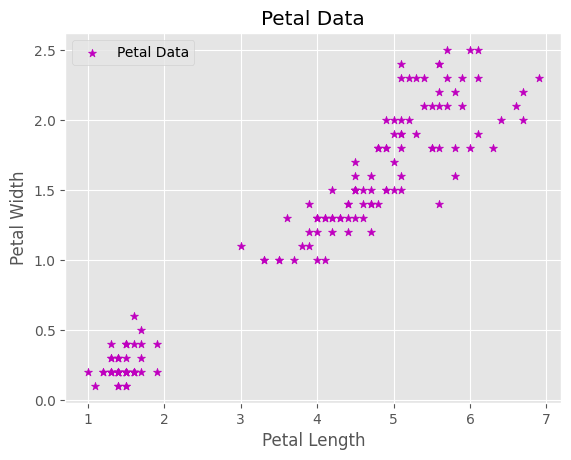

In [175]:
print(data.shape)
print(data.describe())
print("Features correlation")
print(data.corr())
print("A scatter plot showing petal width versus petal length")
plt.style.use('ggplot')
plt.scatter(x=data['petal length (cm)'],y=data['petal width (cm)'],color='m',marker='*',label="Petal Data")
plt.gca().set(xlabel='Petal Length',ylabel='Petal Width',title='Petal Data')
plt.legend()
plt.show()

**Data Preprocessing**

Splitting the dataframe into training and testing sets.bold text bold text

In [176]:
x_values=data["petal length (cm)"].values.reshape(-1,1)
y_values=data["petal width (cm)"].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x_values,y_values,test_size=0.2)
print(x_train)
print()
print(y_train)

[[1.2]
 [5.1]
 [4.5]
 [1.7]
 [3. ]
 [1.5]
 [1.4]
 [4.4]
 [4.5]
 [6.1]
 [5. ]
 [5.8]
 [5.9]
 [1.4]
 [5.7]
 [5.3]
 [3.5]
 [5.6]
 [4.1]
 [5.8]
 [1.3]
 [4.3]
 [4.7]
 [1.6]
 [4.9]
 [1.5]
 [5.4]
 [4. ]
 [1.3]
 [4.6]
 [5.6]
 [3.5]
 [4.7]
 [1.3]
 [4.5]
 [1.6]
 [6.3]
 [6.7]
 [4.8]
 [4.1]
 [1.5]
 [4.3]
 [1.9]
 [1.2]
 [4.2]
 [4.9]
 [1.6]
 [5. ]
 [1.5]
 [4.5]
 [4.7]
 [5.6]
 [1.6]
 [1.5]
 [6.6]
 [1.4]
 [3.8]
 [4.2]
 [5.5]
 [5.4]
 [1.7]
 [4.6]
 [4.4]
 [1.3]
 [5.7]
 [5.1]
 [4.2]
 [4.9]
 [5.6]
 [3.3]
 [4.8]
 [4.5]
 [4.1]
 [1.3]
 [5.1]
 [6.1]
 [4.5]
 [6. ]
 [1.5]
 [1.3]
 [4.8]
 [4. ]
 [4. ]
 [4.6]
 [1.9]
 [1.7]
 [1.4]
 [5.5]
 [4.4]
 [3.9]
 [1.5]
 [6.7]
 [6.4]
 [5. ]
 [1.4]
 [3.6]
 [4.5]
 [1.1]
 [6.9]
 [1.6]
 [5.2]
 [3.3]
 [4. ]
 [4.5]
 [5.1]
 [5.6]
 [1.5]
 [4.2]
 [1.5]
 [1.4]
 [1.6]
 [4.9]
 [5.9]
 [6.1]
 [5.6]
 [4.4]
 [4.9]
 [4.8]
 [5.5]
 [1.5]]

[[0.2]
 [1.5]
 [1.5]
 [0.3]
 [1.1]
 [0.2]
 [0.2]
 [1.3]
 [1.3]
 [2.5]
 [2. ]
 [2.2]
 [2.1]
 [0.2]
 [2.5]
 [2.3]
 [1. ]
 [2.1]
 [1. ]
 [1.8]
 [0.2]
 [1.3]
 [1.

**Model **Training**

In [177]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)
print("Optimal weight and bias terms")
print(f'Weight={regression_model.intercept_}')
print(f'Bias={regression_model.coef_}')

Optimal weight and bias terms
Weight=[-0.36456102]
Bias=[[0.41492443]]


**Assessing the Model**

Function to predict petal width using test data

In [178]:
def predict_petal_width(length):
  return ((regression_model.coef_ * length) + regression_model.intercept_)

In [179]:
pred_data=predict_petal_width(x_test)
print("Predictions based on the test set")
print()
print("       PETAL WIDTHS")
predicted_data=pd.DataFrame({"Actual":y_test.squeeze(),"Predicted":pred_data.squeeze()})
print(predicted_data)

Predictions based on the test set

       PETAL WIDTHS
    Actual  Predicted
0      0.2   0.050363
1      0.2   0.216333
2      0.4   0.257826
3      0.3   0.216333
4      0.2   0.257826
5      0.5   0.340811
6      0.2   0.257826
7      1.9   1.834538
8      0.1   0.216333
9      1.9   1.751554
10     1.4   1.253644
11     2.1   2.000508
12     0.3   0.216333
13     0.1   0.216333
14     1.5   1.710061
15     1.0   1.170659
16     2.3   1.751554
17     0.2   0.299318
18     1.6   1.751554
19     1.2   1.253644
20     1.3   1.295137
21     0.3   0.174841
22     0.2   0.216333
23     1.6   2.042001
24     0.2   0.216333
25     1.4   1.585584
26     1.4   1.585584
27     2.5   2.124986
28     2.0   1.793046
29     2.0   1.751554


Making a random prediction

In [180]:
num=None
print("Input a petal length between 1.0 and 6.9")
num=np.array([float(input(" = "))],dtype=np.float64)
value=predict_petal_width(num)
print(f'The predicted petal width is {value}')

Input a petal length between 1.0 and 6.9
 = 5
The predicted petal width is [[1.71006113]]


**VISUALIZATION**

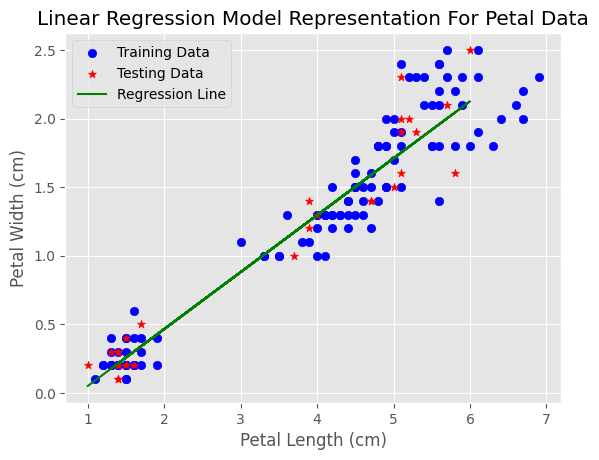

In [182]:
plt.style.use('ggplot')
plt.tight_layout()
plt.scatter(x=x_train.squeeze(),y=y_train.squeeze(),color='b',label='Training Data')
plt.scatter(x=x_test.squeeze(),y=y_test.squeeze(),color='r',label='Testing Data',marker='*')
plt.plot(x_test.squeeze(),pred_data.squeeze(),color='g',label='Regression Line')
plt.gca().set(xlabel='Petal Length (cm)',ylabel='Petal Width (cm)',title='Linear Regression Model Representation For Petal Data')
plt.legend()
plt.show()

**EVALUATING THE MODEL'S PERFFORMANCE**

In [184]:
mae=mean_absolute_error(y_test,pred_data)
mse=mean_squared_error(y_test,pred_data)
rmse=root_mean_squared_error(y_test,pred_data)
print("Model evaluation Metrics")
print()
print(f'Mean Absolute Error={mae}')
print(f'Mean Squared Error={mse}')
print(f'Root Mean Squared Error={rmse}')

Model evaluation Metrics

Mean Absolute Error=0.1494231745007584
Mean Squared Error=0.03696741275485739
Root Mean Squared Error=0.19226911544722255
